In [146]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [147]:
df = pd.read_csv('diabetes.csv')


In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


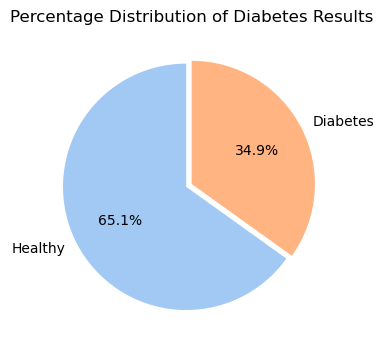

In [150]:
plt.figure(figsize=(4, 4))
plt.pie(df['Outcome'].value_counts(),
        labels=['Healthy', 'Diabetes'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        explode=[0.05, 0]) 
plt.title('Percentage Distribution of Diabetes Results')
plt.show()

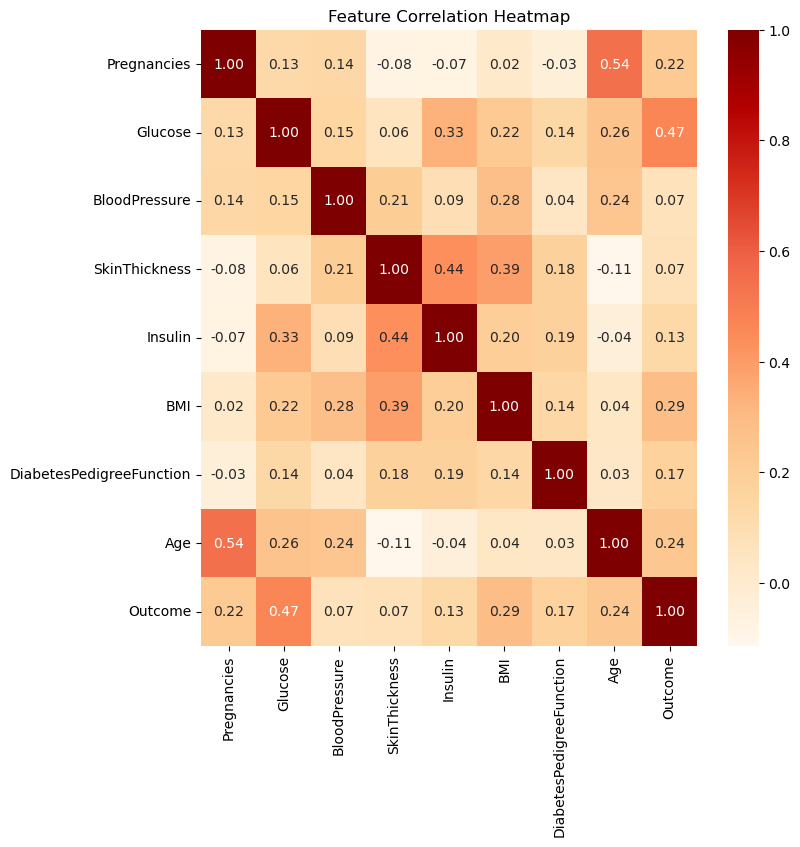

In [151]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='OrRd', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

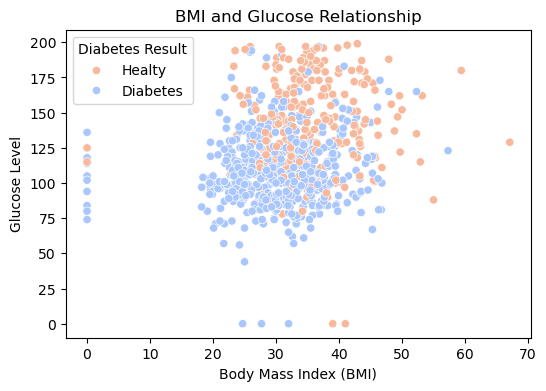

In [152]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df, palette='coolwarm')
plt.title('BMI and Glucose Relationship')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Glucose Level')
plt.legend(title='Diabetes Result', labels=['Healty', 'Diabetes'])
plt.show()

In [153]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report

#The basic features in the data set are continuously evaluated. However, let's try the naive bayes algorithms one by one.

In [155]:
# We implement StandardScaler.
scaler_gaussian = StandardScaler()
X_train_scaled_gaussian = scaler_gaussian.fit_transform(X_train)
X_test_scaled_gaussian = scaler_gaussian.transform(X_test)
# We create and train the Gaussian Naive Bayes model.
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_scaled_gaussian, y_train)
# We make predictions on test data.
y_pred_gaussian = gaussian_nb.predict(X_test_scaled_gaussian)
# We evaluate the model.
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Gaussian Naive Bayes Results:", accuracy_gaussian)
print("Classification Report:")
print(classification_report(y_test, y_pred_gaussian))
print("-" * 50)




# We implement MinMaxScaler 
scaler_multinomial = MinMaxScaler()
X_train_scaled_multinomial = scaler_multinomial.fit_transform(X_train)
X_test_scaled_multinomial = scaler_multinomial.transform(X_test)
# We created and trained the Multinomial Naive Bayes model.
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_scaled_multinomial, y_train)
# We make predictions on test data.
y_pred_multinomial = multinomial_nb.predict(X_test_scaled_multinomial)
# We evaluate the model.
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Multinomial Naive Bayes Results:", accuracy_multinomial)
print("Classification Report:")
print(classification_report(y_test, y_pred_multinomial))
print("-" * 50)





# We implement Binarizer 
binarizer = Binarizer(threshold=0.0) 
X_train_binarized = binarizer.fit_transform(X_train)
X_test_binarized = binarizer.transform(X_test)
# We created and trained the Bernoulli Naive Bayes model.
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train_binarized, y_train)
# We make predictions on test data.
y_pred_bernoulli = bernoulli_nb.predict(X_test_binarized)
# We evaluate the model.
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Bernoulli Naive Bayes Results:", accuracy_bernoulli)
print("Classification Report:")
print(classification_report(y_test, y_pred_bernoulli))
print("-" * 50)





#We implement KBinsDiscretizer 
#We determine how many categories will be divided into with the n bins parameter.
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_categorical = discretizer.fit_transform(X_train)
X_test_categorical = discretizer.transform(X_test)
# We created and trained the Categorical Naive Bayes model
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train_categorical, y_train)
# We make predictions on test data.
y_pred_categorical = categorical_nb.predict(X_test_categorical)
# We evaluate the model.
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print("Categorical Naive Bayes Results:", accuracy_categorical)
print("Classification Report:")
print(classification_report(y_test, y_pred_categorical))




Gaussian Naive Bayes Results: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

--------------------------------------------------
Multinomial Naive Bayes Results: 0.6428571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

--------------------------------------------------
Bernoulli Naive Bayes Results: 0.6558441558441559
Classification Report:
              precision 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [156]:
# Let's look at the best n bins value for categorical naive bayes.

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

In [158]:
pipeline = Pipeline([
    ('discretizer', KBinsDiscretizer(encode='ordinal', strategy='uniform')),
    ('classifier', CategoricalNB())
])
#We create a pipeline for this.

In [159]:
param_grid = {'discretizer__n_bins': [2, 3, 5, 8, 9, 10, 15, 20, 25 ]}
#We define the n bins values ​​to be tried.

In [161]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#We configure StratifiedKFold cross-validation 

# We perform hyperparameter search with GridSearchCV.
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# We print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy", grid_search.best_score_)

# We evaluate the best model and test data.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy :", test_accuracy)

Best Parameters: {'discretizer__n_bins': 15}
Best Cross-Validation Accuracy 0.7703718512594963
Best Model Accuracy : 0.7337662337662337


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_dis